In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten
from sklearn.model_selection import train_test_split


# In[2]:

path = os.listdir('/kaggle/input/hrct-chest-covid-data-ct-scan/HRCT-Chest-Covid-Data-CT-SCAN/HRCT Chest Covid Data CT SCAN')
path_name = '/kaggle/input/hrct-chest-covid-data-ct-scan/HRCT-Chest-Covid-Data-CT-SCAN/HRCT Chest Covid Data CT SCAN'

# In[3]:


classes = ['Covid','Normal']
def obtain_data(X,Y,path):
    for i in classes:
        path_new = os.path.join(path,i)
        for j in os.listdir(path_new):
            img = cv2.imread(os.path.join(path_new,j))
            img = cv2.resize(img,(128,128))
            X.append(img)
            Y.append(i)


# In[4]:


images = []
labels = []
obtain_data(images,labels,path_name)


# In[5]:

images = np.array(images)
labels = np.array(labels)
X_train,X_test,Y_train,Y_test = train_test_split(images, labels, test_size=0.2)


# In[6]:


X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
y_train_new = []
for i in Y_train:
    y_train_new.append(classes.index(i))
Y_train = y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)
y_test_new = []
for i in Y_test:
    y_test_new.append(classes.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


# Converging Path :
# 
# Layer 1

# In[7]:


inputs = tf.keras.layers.Input((128,128,3))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)


# Layer 2

# In[8]:


c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.3)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)


# Layer 3

# In[9]:


c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)


# Layer 4

# In[10]:


c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)


# Layer 5

# In[11]:


c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)


# Expansive Path:
# 
# Layer 1

# In[12]:


u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)


# Layer 2

# In[13]:


u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)


# Layer 3

# In[14]:


u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
u8 = tf.keras.layers.Dropout(0.2)(u8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)


# Layer 4

# In[15]:


u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)


# Layer 5

# In[16]:

c10 = tf.keras.layers.Conv2D(4,(1,1),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))(c9)
c10 = tf.keras.layers.Dropout(0.3)(c10)
c10= tf.keras.layers.Flatten()(c10)
c12= tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.L2(0.01),activity_regularizer=tf.keras.regularizers.L1(0.01))(c10)
c12 = tf.keras.layers.Dropout(0.2)(c12)
outputs = tf.keras.layers.Dense(2,activation = 'sigmoid')(c12)


# In[17]:


model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'], sample_weight_mode='temporal')
model.summary()


# Model Checkpoint

# In[18]:


checkpointer = tf.keras.callbacks.ModelCheckpoint('CHEST_CT_MODEL.h5',verbose=1,save_best_only=True)


# Early Stopping

# In[19]:


callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.01,patience=20,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]


# In[ ]:


results = model.fit(X_train,Y_train,validation_split=0.2,batch_size=64,epochs=200,callbacks=callbacks)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

2023-08-01 19:40:33.332672: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


61/61 [==============================] - 28s 155ms/step - loss: 7.5426 - accuracy: 0.6051 - val_loss: 1.8917 - val_accuracy: 0.6125
Epoch 2/200
61/61 [==============================] - 7s 111ms/step - loss: 1.2307 - accuracy: 0.6413 - val_loss: 0.9106 - val_accuracy: 0.6125
Epoch 3/200
61/61 [==============================] - 7s 111ms/step - loss: 0.8351 - accuracy: 0.6413 - val_loss: 0.8013 - val_accuracy: 0.6125
Epoch 4/200
61/61 [==============================] - 7s 117ms/step - loss: 0.8135 - accuracy: 0.7824 - val_loss: 0.7510 - val_accuracy: 0.9959
Epoch 5/200
61/61 [==============================] - 7s 111ms/step - loss: 0.7078 - accuracy: 0.9897 - val_loss: 0.6388 - val_accuracy: 0.9969
Epoch 6/200
61/61 [==============================] - 7s 117ms/step - loss: 0.6274 - accuracy: 0.9918 - val_loss: 0.5809 - val_accuracy: 0.9990
Epoch 7/200
61/61 [==============================] - 7s 111ms/step - loss: 0.5714 - accuracy: 0.9961 - val_loss: 0.5364 - val_accuracy: 0.9969
Epoch 8/20

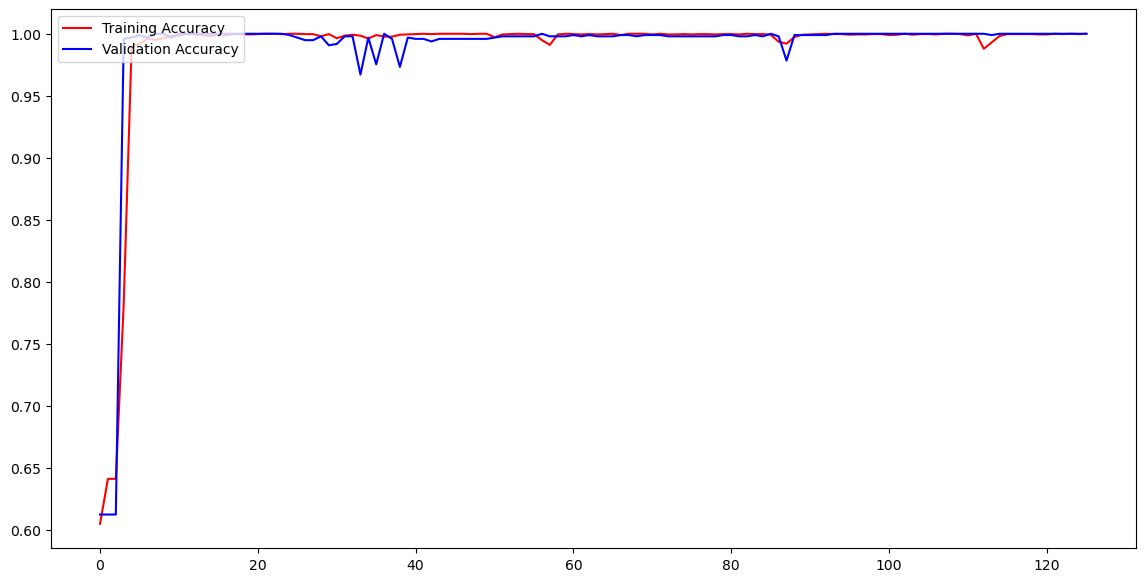

In [2]:
model.save('CHEST_CT_MODEL.h5')
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


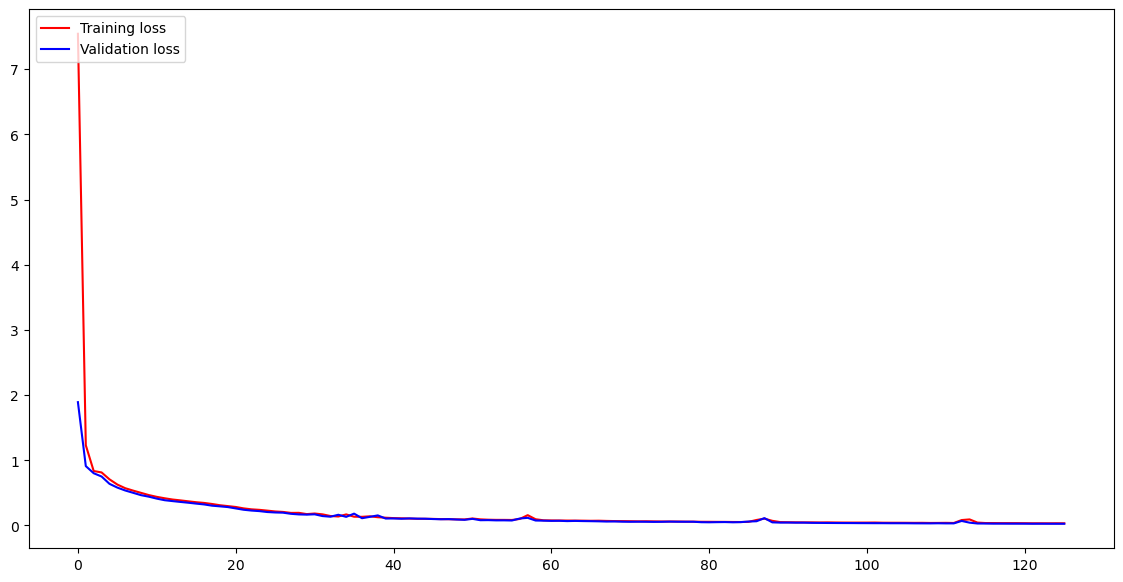

In [3]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [4]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
score = model.evaluate(X_test, Y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(1217, 128, 128, 3)
39/39 [==============================] - 1s 22ms/step - loss: 0.0256 - accuracy: 1.0000
Test loss: 0.02564430981874466
Test accuracy: 1.0


1/1 [==============================] - 0s 324ms/step


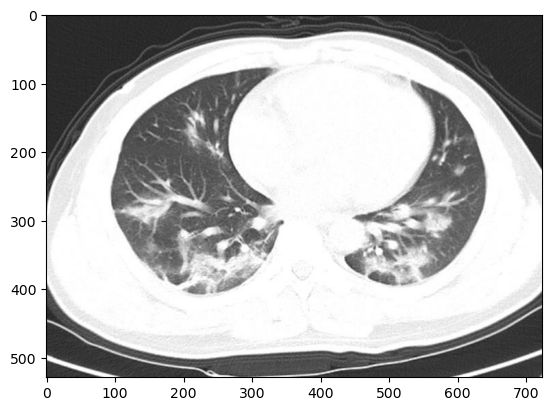

NameError: name 'pred_name' is not defined

In [5]:
realimg = '/kaggle/input/testing-data/2020.01.24.919183-p27-134.png'
img1 = cv2.imread(realimg)
img1 = cv2.resize(img1,(128,128))
img1 =  np.array(img1)
img1 = img1.reshape(1,128,128,3)

prediction = model.predict(img1)
pred_val_1 = prediction.argmax()
n1 = pred_val_1.item()

img_plot = plt.imshow(mpimg.imread(realimg))
plt.show()

pred_name(n1)